In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from janelia_core.ml.extra_torch_modules import SumOfTiledHyperCubeBasisFcns
from janelia_core.visualization.matrix_visualization import cmp_n_mats

## Define a helper function

In [110]:
def produce_y_image(f, x_range = [0.0, .999], y_range = [0.0, .999], n_points_per_side=100):
    
    with torch.no_grad():
        grid = np.mgrid[x_range[0]:x_range[1]:n_points_per_side * 1j,
                        y_range[0]:y_range[1]:n_points_per_side * 1j]

        grid_vec = np.stack([np.ravel(grid[0, :, :]), np.ravel(grid[1, :, :])]).transpose()
        grid_vec = torch.from_numpy(grid_vec.astype('float32'))

        y = f(grid_vec).detach().numpy()
        y_image = np.reshape(y, [n_points_per_side, n_points_per_side])
    
        return y_image
    
        #plt.imshow(y_image, extent=[x_range[0], x_range[1], y_range[0], y_range[1]], origin='lower')
        #plt.colorbar()

## Create a target mapping we will try to learn and training data

In [111]:
def true_map(x, bump_ctrs, bump_mags, bump_stds):
    
    n_smps = x.shape[0]
    
    with torch.no_grad():
        y = torch.zeros([n_smps,1])
        
        
        for i in range(n_bumps):
            bump_ctr = bump_ctrs[i, :]
            bump_mag = bump_mags[i]
            bump_std = bump_stds[i, :]
    
            y_i = bump_mag*torch.exp(-1*torch.sum(((x - bump_ctr)/bump_std)**2,1))
            y += y_i.view([n_smps, 1])
            
        return y

In [112]:
n_bumps = 20

bump_ctrs = torch.zeros(n_bumps, 2)
bump_mags = torch.ones(n_bumps)
bump_stds = .05*torch.ones(n_bumps, 2)

for i in range(n_bumps):
    bump_ctrs[i,:] = torch.rand(2)

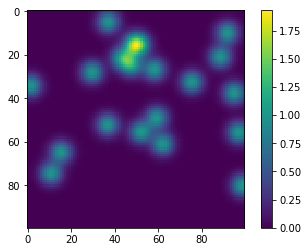

In [113]:
# Visualize target mapping
f_true = lambda x: true_map(x, bump_ctrs, bump_mags, bump_stds)
true_y = produce_y_image(f_true)
plt.imshow(true_y)
plt.colorbar()

## Define the function we will fit

In [138]:
n_divs_per_dim = [200, 200]
dim_ranges = np.asarray([[0, 1.0], [0, 1.0]])
n_div_per_bump_per_dim = np.asarray([5, 5], dtype='int')

f = SumOfTiledHyperCubeBasisFcns(n_divs_per_dim, dim_ranges, n_div_per_bump_per_dim)

## Generate sample points for training

In [139]:
n_smps = 10000
x = torch.rand([n_smps, 2])
y = f_true(x)

## Fit the function 

In [140]:
optimizer = torch.optim.Adam(f.parameters(), lr=.01)

for i in range(1000):
    
    optimizer.zero_grad()
    er = torch.sum((y - f(x))**2)
    er.backward()
    optimizer.step()
    
    er_r = er.detach().numpy()
    
    if i % 100 == 0:
        print('er: ' + str(er))
    

er: tensor(940.7935, grad_fn=<SumBackward0>)
er: tensor(0.1334, grad_fn=<SumBackward0>)
er: tensor(0.1098, grad_fn=<SumBackward0>)
er: tensor(0.1095, grad_fn=<SumBackward0>)
er: tensor(0.1095, grad_fn=<SumBackward0>)
er: tensor(0.1095, grad_fn=<SumBackward0>)
er: tensor(0.1095, grad_fn=<SumBackward0>)
er: tensor(0.1095, grad_fn=<SumBackward0>)
er: tensor(0.1095, grad_fn=<SumBackward0>)
er: tensor(0.1095, grad_fn=<SumBackward0>)


## Visualize true and target mapping

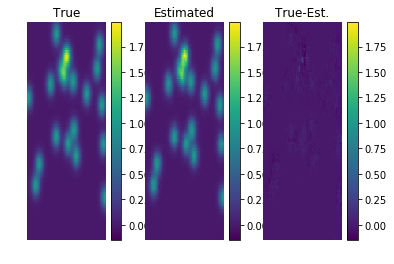

In [141]:
est_y = produce_y_image(f)
axes = cmp_n_mats([true_y, est_y, true_y-est_y], 
           titles=['True', 'Estimated', 'True-Est.'],
           show_colorbars=True)

In [ ]:
v = torch.Tensor([100, 50, 1])
o = np.argsort(v)

In [ ]:
o

In [ ]:
list(range(-1, -1, -1))

In [ ]:
r = torch.arange(0, 10).repeat(1)

In [ ]:
r % 5

In [ ]:
np.ravel_multi_index(([0,1], [0, 1]), (2, 2))

In [ ]:
torch.zeros([2, 10])

In [ ]:
from janelia_core.math.basic_functions import int_to_arb_base

In [ ]:
v = int_to_arb_base(np.asarray([54]).astype('int'), np.asarray([5, 3, 3]))

In [ ]:
v.dtype

In [ ]:
a = np.asarray([999, 0])

In [ ]:
a.dtype == np.int

In [ ]:
a = np.asarray([1, 2, 3])

In [ ]:
np.cumprod(a[0:-1])[-1]

In [ ]:
np.arange(4, -1, -1)

In [ ]:
3 % 3

In [ ]:
np.asarray([4], dtype='long')/np.asarray([2], dtype='long')

In [ ]:
int(1.0)

In [ ]:
list(range(0, -1, -1))